In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
ibm = pd.read_csv("ibm.csv")
apple = pd.read_csv("apple.csv")
bac = pd.read_csv("bac.csv")
ford = pd.read_csv("ford.csv")
ed = pd.read_csv("ed.csv")
ms = pd.read_csv("ms.csv")

In [3]:
# Function to compute returns
def compute_returns(df):
    y = df.iloc[:, 4]
    a = [0] 
    for i in range(1, 121):  
        a.append((y[i] - y[i - 1]) / y[i])
    return a[1:]

In [4]:
# Compute returns for each company
x1 = compute_returns(ibm)
x2 = compute_returns(apple)
x3 = compute_returns(bac)
x4 = compute_returns(ford)
x5 = compute_returns(ed)
x6 = compute_returns(ms)

In [5]:
# Combine all assets
x = np.column_stack((x1, x2, x3, x4, x5, x6))

In [6]:
# Calculate portfolio weights
s1 = np.linalg.inv(np.cov(x.T))  # Inverse of empirical variance
one = np.ones(6)  # Vector of ones
c2 = np.dot(s1, one) / np.dot(np.dot(one.T, s1), one)  # Optimal weights
c1 = one / one.sum()  # Equally weighted

# Calculate portfolio returns
q1 = np.dot(x, c1)  # Equally weighted portfolio returns
q2 = np.dot(x, c2)  # Optimal weighted portfolio returns

In [7]:
# Time Series
t = np.arange(1, 121)
ts1 = pd.DataFrame({'Time': t, 'Returns': q1})
ts2 = pd.DataFrame({'Time': t, 'Returns': q2})

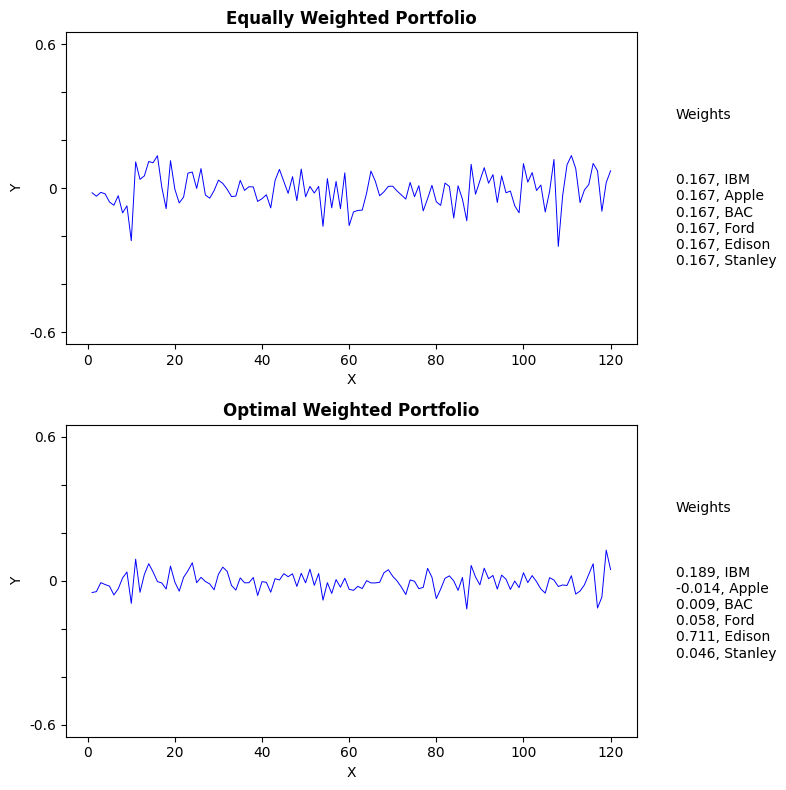

In [8]:
# Plotting
plt.figure(figsize=(8, 8))

stock_names = ['IBM', 'Apple', 'BAC', 'Ford', 'Edison', 'Stanley']

# Equally Weighted Portfolio
plt.subplot(2, 1, 1)
plt.plot(ts1['Time'], ts1['Returns'], color='blue', linewidth=0.7)
plt.title('Equally Weighted Portfolio', fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-0.65, 0.65)
plt.yticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6], ['-0.6', '', '', '0', '', '', '0.6'])
weights_text = "Weights\n\n\n\n" + "\n".join([f"{weight:.3f}, {name}" for weight, name in zip(c1, stock_names)])
plt.text(ts1['Time'].iloc[-1] + 15, 0, weights_text, verticalalignment='center')

# Optimal Weighted Portfolio
plt.subplot(2, 1, 2)
plt.plot(ts2['Time'], ts2['Returns'], color='blue', linewidth=0.7)
plt.title('Optimal Weighted Portfolio', fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-0.65, 0.65)
plt.yticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6], ['-0.6', '', '', '0', '', '', '0.6'])
weights_text = "Weights\n\n\n\n" + "\n".join([f"{weight:.3f}, {name}" for weight, name in zip(c2, stock_names)])
plt.text(ts2['Time'].iloc[-1] + 15, 0, weights_text, verticalalignment='center')

plt.tight_layout()
plt.show()